<a href="https://colab.research.google.com/github/Imama-Kainat/ByteWise-MLDL/blob/main/Reveal_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries:

**pandas**: Used for data manipulation and analysis.
numpy: Used for numerical operations and working with arrays.
**TfidfVectorizer**: A class from sklearn that converts text data into TF-IDF features.
**KMeans**: A clustering algorithm from sklearn to group data into clusters.
**nltk**: The Natural Language Toolkit for working with human language data.
**re**: A library for regular expressions, useful for string manipulation.
**NLTK Downloads**: We download the necessary resources from NLTK for tokenization (punkt) and stop word removal (stopwords).


#TF-IDF
 for vectorization helps in transforming text data into a numerical format that machine learning algorithms can work with. It allows us to analyze the significance of words across reviews, which is essential for tasks like clustering and topic modeling

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary files from NLTK
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load the reviews dataset
reviews = pd.read_csv("reviews.csv")


In [3]:
# Preprocess the negative reviews
def preprocess_reviews(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words and non-alpha characters
    stop_words = set(stopwords.words('english'))
    tokens = [re.sub(r'[^a-z]', '', token) for token in tokens if token not in stop_words]
    return tokens

# Filter for negative reviews (score of 1 or 2)
negative_reviews = reviews[reviews['score'].isin([1, 2])]

# Apply preprocessing
negative_reviews['tokens'] = negative_reviews['content'].apply(preprocess_reviews)


<ipython-input-3-84222b2666b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['content'].apply(preprocess_reviews)


In [4]:
# Create a DataFrame for the preprocessed reviews
preprocessed_reviews = pd.DataFrame({
    'content': negative_reviews['content'],
    'score': negative_reviews['score'],
    'tokens': negative_reviews['tokens']
})

# Combine the tokens back into a single string for each review
preprocessed_reviews['cleaned_text'] = preprocessed_reviews['tokens'].apply(lambda x: ' '.join(x))


In [5]:
# Vectorize the cleaned negative reviews using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_reviews['cleaned_text'])


In [6]:
# Apply K-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Get the predicted labels
categories = kmeans.labels_.tolist()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-7b375280be19>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['cleaned_content'] = negative_reviews['content'].apply(preprocess_text)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   cluster_label      term   frequency
0              0     tasks   64.629886
1              1       app  169.483712
2              2  calendar   75.714445
3              3      good   37.173626
4              4   version   71.097104


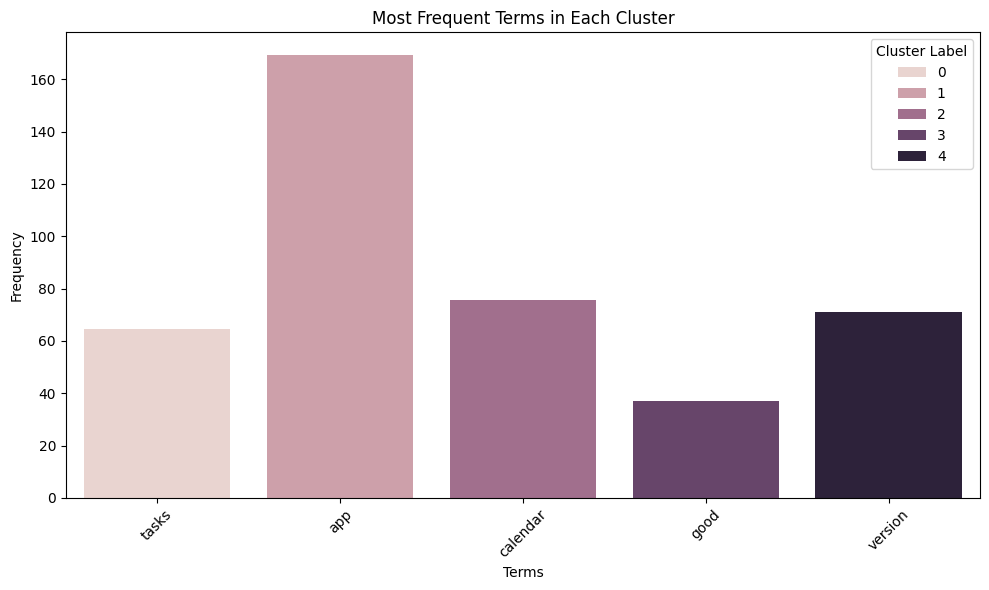

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary files from NLTK
nltk.download("punkt")
nltk.download("stopwords")

# Load the reviews dataset
reviews = pd.read_csv("reviews.csv")

# Preprocess the negative reviews
negative_reviews = reviews[reviews['score'].isin([1, 2])]
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lower case
    # Remove stop words and non-alpha characters
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
negative_reviews['cleaned_content'] = negative_reviews['content'].apply(preprocess_text)

# Vectorize the cleaned negative reviews using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(negative_reviews['cleaned_content'])

# Apply K-means clustering
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
categories = kmeans.fit_predict(tfidf_matrix)

# Find the most frequent term for each cluster
topic_terms_list = []
feature_names = vectorizer.get_feature_names_out()

for cluster in range(num_clusters):
    # Get the indices of the documents in the cluster
    cluster_indices = np.where(categories == cluster)[0]

    if cluster_indices.size > 0:  # Ensure there are reviews in the cluster
        # Count the frequency of terms in this cluster
        term_frequency = np.sum(tfidf_matrix[cluster_indices].toarray(), axis=0)

        # Get the index of the most frequent term
        most_frequent_index = np.argmax(term_frequency)

        # Get the term and its frequency
        most_frequent_term = feature_names[most_frequent_index]
        frequency = term_frequency[most_frequent_index]

        # Append to the topic_terms_list
        topic_terms_list.append({
            'cluster_label': cluster,
            'term': most_frequent_term,
            'frequency': frequency
        })

# Create a DataFrame from the list of topic terms
topic_terms = pd.DataFrame(topic_terms_list)

# Print the topic terms DataFrame
print(topic_terms)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_terms, x='term', y='frequency', hue='cluster_label')
plt.title('Most Frequent Terms in Each Cluster')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Cluster Label')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             content  score
0                      I cannot open the app anymore      1
1  I have been begging for a refund from this app...      1
2  Very costly for the premium version (approx In...      1
3  Used to keep me organized, but all the 2020 UP...      1
4                                Dan Birthday Oct 28      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12495 non-null  object
 1   score    12495 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.4+ KB
None
score
5    2879
4    2775
1    2506
2    2344
3    1991
Name: count, dtype: int64
                                             content  score
0                      I cannot open the app anymore      1
1  I have been begging for a refund from this app...      1
2  Very costly for the premium version (approx In...      1
3  Us

<ipython-input-11-057089a5d58a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['cleaned_content'] = negative_reviews['content'].apply(preprocess_text)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                             content  \
0                      I cannot open the app anymore   
1  I have been begging for a refund from this app...   
2  Very costly for the premium version (approx In...   
3  Used to keep me organized, but all the 2020 UP...   
4                                Dan Birthday Oct 28   

                                     cleaned_content  
0                                   open app anymore  
1           begging refund app month nobody replying  
2  costly premium version approx indian rupees pe...  
3  used keep organized updates made mess things c...  
4                                   dan birthday oct  
(4850, 7054)


<ipython-input-11-057089a5d58a>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['cluster'] = categories


                                             content  cluster
0                      I cannot open the app anymore        1
1  I have been begging for a refund from this app...        1
2  Very costly for the premium version (approx In...        4
3  Used to keep me organized, but all the 2020 UP...        1
4                                Dan Birthday Oct 28        1
  cluster_label      term frequency
0             0     tasks       480
1             1       app      2032
2             2  calendar       478
3             3      good        49
4             4   version       430


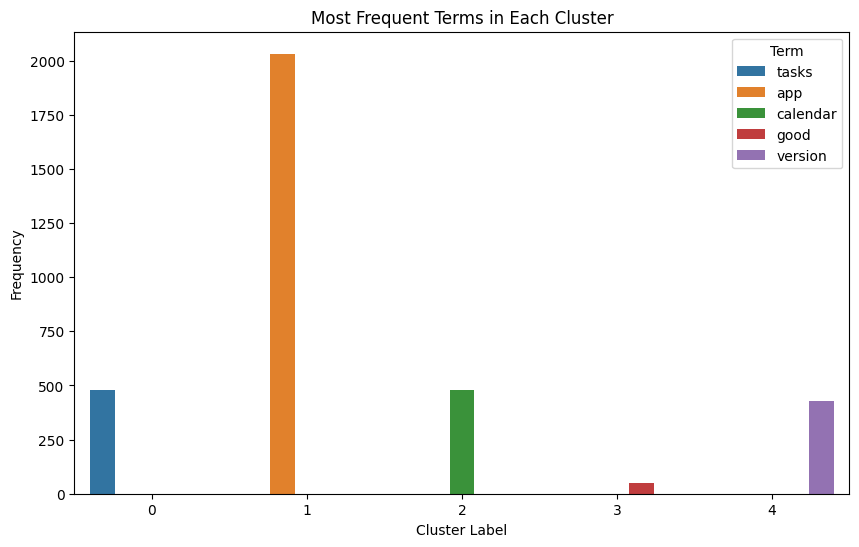

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary files from NLTK
nltk.download("punkt")
nltk.download("stopwords")

# Load the reviews dataset
reviews = pd.read_csv("reviews.csv")
print(reviews.head())  # Check the first few rows
print(reviews.info())  # Check the DataFrame information

# Check the distribution of scores
print(reviews['score'].value_counts())

# Preprocess the negative reviews
negative_reviews = reviews[reviews['score'].isin([1, 2])]
print(negative_reviews.head())  # Check the negative reviews

# Check if negative reviews are present
if negative_reviews.empty:
    print("No negative reviews found.")
else:
    stop_words = set(stopwords.words("english"))

    def preprocess_text(text):
        # Tokenization
        tokens = word_tokenize(text.lower())  # Convert to lower case
        # Remove stop words and non-alpha characters
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return " ".join(tokens)

    # Apply preprocessing
    negative_reviews['cleaned_content'] = negative_reviews['content'].apply(preprocess_text)
    print(negative_reviews[['content', 'cleaned_content']].head())  # Check cleaned reviews

    # Vectorize the cleaned negative reviews using TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(negative_reviews['cleaned_content'])
    print(tfidf_matrix.shape)  # Check the shape of the TF-IDF matrix

    # Apply K-means clustering
    num_clusters = 5
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    categories = kmeans.fit_predict(tfidf_matrix)

    # Add the cluster labels to the DataFrame
    negative_reviews['cluster'] = categories
    print(negative_reviews[['content', 'cluster']].head())  # Check the assigned clusters

    # Create a DataFrame to store the most frequent terms for each cluster
    topic_terms = pd.DataFrame(columns=['cluster_label', 'term', 'frequency'])

    # Find the most frequent term in each cluster
    for cluster in range(num_clusters):
        cluster_indices = np.where(categories == cluster)[0]
        cluster_texts = negative_reviews['cleaned_content'].iloc[cluster_indices]
        all_words = ' '.join(cluster_texts).split()

        # Count word frequencies
        word_freq = pd.Series(all_words).value_counts()

        # Most frequent term in the cluster
        if not word_freq.empty:
            most_frequent_term = word_freq.idxmax()
            term_frequency = word_freq.max()

            # Append to the topic_terms DataFrame using concat
            topic_terms = pd.concat([topic_terms, pd.DataFrame({
                'cluster_label': [cluster],
                'term': [most_frequent_term],
                'frequency': [term_frequency]
            })], ignore_index=True)

    # Display the topic terms DataFrame
    print(topic_terms)



  cluster_label      term frequency
0             0     tasks       480
1             1       app      2032
2             2  calendar       478
4             4   version       430


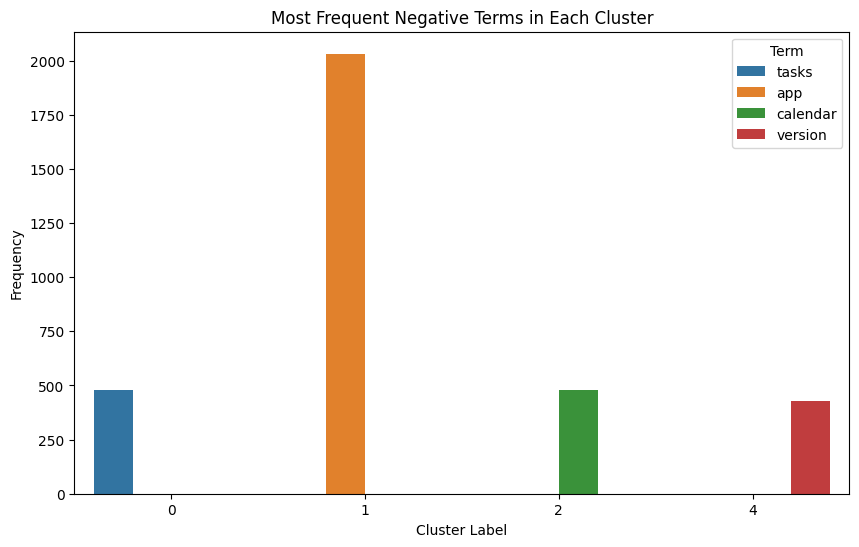

In [12]:
# Assuming you already have your topic_terms DataFrame
# Filter for terms specifically associated with negative reviews
negative_terms = topic_terms[topic_terms['frequency'] > 50]  # Only show terms with high frequency
print(negative_terms)

# Visualize the most frequent terms for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=negative_terms, x='cluster_label', y='frequency', hue='term', dodge=True)
plt.title('Most Frequent Negative Terms in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.legend(title='Term')
plt.show()
